**هدف این سلول:**  
وارد کردن کتابخانه‌های موردنیاز برای تحلیل داده

**توضیح:**  

`import pandas as pd`

به معنای وارد کردن کتابخانه پانداس با نام اختصاری پی‌دی است. بنابراین برای استفاده از توابع این کتابخانه، بصورت زیر در کد استفاده می‌شود

`pd.function_name`

####Example :   pd.read_csv()

In [ ]:
# --- Import libraries ---
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
# --- Load CSV from Google Drive ---
# دانلود فایل داده از گوگل درایو
url = 'https://drive.google.com/uc?id=1EIYVuHQV6XptTb03oiKYBIgtLb6t3wc8'
df = pd.read_csv(url)

# --- Display basic info ---
print("Dataset shape:", df.shape)
print(df.head())

Dataset shape: (5127, 14)
   Unnamed: 0  DEPTH (M)  BVW (V/V)  CARB_FLAG (UNITLESS)  \
0           0  3666.5916   0.111705                   0.0   
1           1  3666.7440   0.112236                   0.0   
2           2  3666.8964   0.114825                   0.0   
3           3  3667.0488   0.114419                   0.0   
4           4  3667.2012   0.115867                   0.0   

   COAL_FLAG (UNITLESS)  PHIF (V/V)  RHOFL (G/CM3)  RHOMA (G/CM3)  RW (OHMM)  \
0                   0.0    0.199843            0.8           2.66   0.021643   
1                   0.0    0.218743            0.8           2.66   0.021642   
2                   0.0    0.242380            0.8           2.66   0.021642   
3                   0.0    0.226408            0.8           2.66   0.021641   
4                   0.0    0.216169            0.8           2.66   0.021640   

   SAND_FLAG (UNITLESS)  SW (V/V)  TEMP (DEGC)  VSH (V/V)  KLOGH (MD)  
0                   0.0    0.5590     112.7249   0.598

In [1]:
# این دستور توضیحات آماری هر ستون را جداگانه نشان می‌دهد که برای آشنایی بهتر با داده‌ها مناسب است

df.describe()

NameError: name 'df' is not defined

In [ ]:
df.head()

,Unnamed: 0,DEPTH (M),BVW (V/V),CARB_FLAG (UNITLESS),COAL_FLAG (UNITLESS),PHIF (V/V),RHOFL (G/CM3),RHOMA (G/CM3),RW (OHMM),SAND_FLAG (UNITLESS),SW (V/V),TEMP (DEGC),VSH (V/V),KLOGH (MD)
0,0,3666.5916,0.111705,0.0,0.0,0.199843,0.8,2.66,0.021643,0.0,0.5590,112.7249,0.598800,0.0003
1,1,3666.7440,0.112236,0.0,0.0,0.218743,0.8,2.66,0.021642,0.0,0.5131,112.7285,0.599555,0.0000
2,2,3666.8964,0.114825,0.0,0.0,0.242380,0.8,2.66,0.021642,0.0,0.4737,112.7321,0.600310,0.0000
3,3,3667.0488,0.114419,0.0,0.0,0.226408,0.8,2.66,0.021641,0.0,0.5054,112.7358,0.601065,0.0000
4,4,3667.2012,0.115867,0.0,0.0,0.216169,0.8,2.66,0.021640,0.0,0.5360,112.7394,0.601820,0.0000


**هدف این سلول:**  
تعیین متغیرهای مستقل و وابسته و ساخت مدل رگرسیون خطی چندگانه بین آنها

**توضیح:**  
در این سلول ابتدا متغیرهای مستقل و وابسته طبق توضیحات فایل آموزشی مشخص می‌شوند.
سپس مدل رگرسیون خطی چندگانه برای آنها ساخته می‌شود. توجه کنید به علت نیاز به بررسی‌های آماری از کل داده‌ها برای ساخت مدل استفاده شده است که توضیحات مربوطه در بخش بحث در نتایج فایل آموزشی ارائه شده است
در ادامه‌ی دستورات این سلول نمودارهای مربوطه و ضرایب عملکردی محاسبه و نمایش داده شده است

In [ ]:
# --- Define response and predictors ---
y = df['KLOGH (MD)']
X = df[['BVW (V/V)', 'CARB_FLAG (UNITLESS)', 'COAL_FLAG (UNITLESS)', 'PHIF (V/V)', 'RHOFL (G/CM3)', 'RHOMA (G/CM3)',
        'RW (OHMM)', 'SAND_FLAG (UNITLESS)', 'SW (V/V)', 'TEMP (DEGC)', 'VSH (V/V)']]



# --- Clean predictors ---
X = X.replace([np.inf, -np.inf], np.nan)
X = X.dropna()
y = y.loc[X.index] # همسان کردن index

# Add constant for intercept
X = sm.add_constant(X)

# --- Fit multiple linear regression ---
model = sm.OLS(y, X).fit()

# --- Summary statistics ---
print(model.summary())

# --- Residuals and fitted values ---
fitted = model.fittedvalues
residuals = model.resid

                            OLS Regression Results                            
Dep. Variable:             KLOGH (MD)   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     135.8
Date:                Sun, 28 Dec 2025   Prob (F-statistic):          2.07e-272
Time:                        08:27:44   Log-Likelihood:                -37568.
No. Observations:                4818   AIC:                         7.516e+04
Df Residuals:                    4806   BIC:                         7.524e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.529e+05 

## RSS, RSE
محاسبه این مقادیر طبق روابط فایل آموزشی

In [ ]:
# ======================
# Extract quantities
# ======================
RSS = np.sum(model.resid ** 2)
n = int(model.nobs)
p = int(model.df_model)  # number of predictors (excluding intercept)

RSE = np.sqrt(RSS / (n - p - 1))

y_mean = y.mean()
y_std = y.std(ddof=1)

# ======================
# Ratios
# ======================
RSE_mean_ratio = (RSE / y_mean) * 100
RSE_std_ratio = (RSE / y_std) * 100

# ======================
# Print results
# ======================
print(f"Number of observations (n): {n}")
print(f"Number of predictors (p): {p}")
print(f"Residual Standard Error (RSE): {RSE:.3f}\n")

print(f"RSE / mean(y): {RSE_mean_ratio:.2f}%")
print(f"RSE / std(y):  {RSE_std_ratio:.2f}%")


Number of observations (n): 4818
Number of predictors (p): 11
Residual Standard Error (RSE): 589.821

RSE / mean(y): 296.38%
RSE / std(y):  87.45%


## ساخت مدل ساده طبق فایل آموزشی
**هدف این سلول:**  
تعیین متغیرهای مستقل و وابسته و ساخت مدل رگرسیون خطی چندگانه بین آنها

In [ ]:
# --- Define response and predictors ---
y = df['KLOGH (MD)']
X = df[['BVW (V/V)', 'PHIF (V/V)', 'RHOFL (G/CM3)', 'RHOMA (G/CM3)',
        'RW (OHMM)','SAND_FLAG (UNITLESS)', 'SW (V/V)', 'TEMP (DEGC)', 'VSH (V/V)']]



# --- Clean predictors ---
X = X.replace([np.inf, -np.inf], np.nan)
X = X.dropna()
y = y.loc[X.index] # همسان کردن index

# Add constant for intercept
X = sm.add_constant(X)

# --- Fit multiple linear regression ---
model = sm.OLS(y, X).fit()

# --- Summary statistics ---
print(model.summary())

# --- Residuals and fitted values ---
fitted = model.fittedvalues
residuals = model.resid

                            OLS Regression Results                            
Dep. Variable:             KLOGH (MD)   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     160.2
Date:                Sun, 28 Dec 2025   Prob (F-statistic):          1.79e-266
Time:                        08:29:04   Log-Likelihood:                -38351.
No. Observations:                4891   AIC:                         7.672e+04
Df Residuals:                    4881   BIC:                         7.679e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.552e+05 

## RSS, RSE
محاسبه این مقادیر طبق روابط فایل آموزشی

In [ ]:
# ======================
# Extract quantities
# ======================
RSS = np.sum(model.resid ** 2)
n = int(model.nobs)
p = int(model.df_model)  # number of predictors (excluding intercept)

RSE = np.sqrt(RSS / (n - p - 1))

y_mean = y.mean()
y_std = y.std(ddof=1)

# ======================
# Ratios
# ======================
RSE_mean_ratio = (RSE / y_mean) * 100
RSE_std_ratio = (RSE / y_std) * 100

# ======================
# Print results
# ======================
print(f"Number of observations (n): {n}")
print(f"Number of predictors (p): {p}")
print(f"Residual Standard Error (RSE): {RSE:.3f}\n")

print(f"RSE / mean(y): {RSE_mean_ratio:.2f}%")
print(f"RSE / std(y):  {RSE_std_ratio:.2f}%")


Number of observations (n): 4891
Number of predictors (p): 9
Residual Standard Error (RSE): 615.985

RSE / mean(y): 308.22%
RSE / std(y):  87.94%


## RHOMA مدل رگرسیون خطی ساده با متغیر

In [ ]:
# --- Define response and predictors ---
y = df['KLOGH (MD)']
X = df[['RHOMA (G/CM3)']]



# --- Clean predictors ---
X = X.replace([np.inf, -np.inf], np.nan)
X = X.dropna()
y = y.loc[X.index] # همسان کردن index

# Add constant for intercept
X = sm.add_constant(X)

# --- Fit multiple linear regression ---
model = sm.OLS(y, X).fit()

# --- Summary statistics ---
print(model.summary())

# --- Residuals and fitted values ---
fitted = model.fittedvalues
residuals = model.resid

                            OLS Regression Results                            
Dep. Variable:             KLOGH (MD)   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     195.1
Date:                Tue, 23 Dec 2025   Prob (F-statistic):           1.69e-43
Time:                        11:56:49   Log-Likelihood:                -38888.
No. Observations:                4891   AIC:                         7.778e+04
Df Residuals:                    4889   BIC:                         7.779e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.987e+04   2124.123     14.061

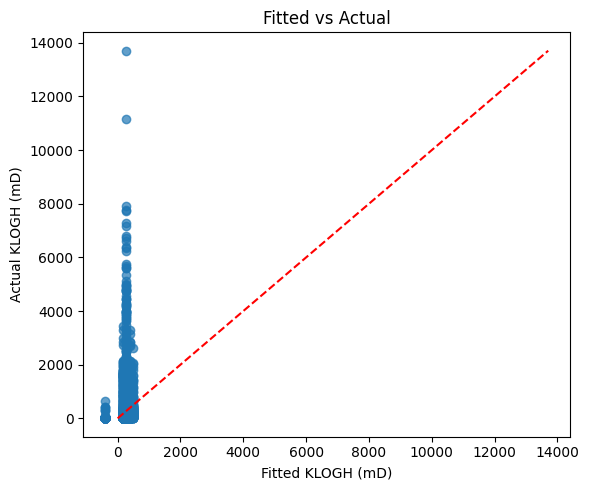

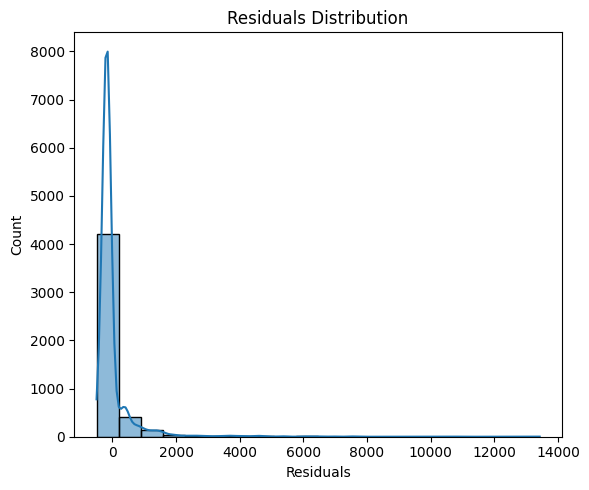

In [ ]:
# --- Plot: Fitted vs Actual ---
plt.figure(figsize=(6,5))
plt.scatter(fitted, y, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Fitted KLOGH (mD)")
plt.ylabel("Actual KLOGH (mD)")
plt.title("Fitted vs Actual")
plt.tight_layout()
plt.show()

# --- Plot: Residuals ---
plt.figure(figsize=(6,5))
sns.histplot(residuals, kde=True, bins=20)
plt.xlabel("Residuals")
plt.title("Residuals Distribution")
plt.tight_layout()
plt.show()

## محاسبه بازه پیش بینی طبق توضیحات فایل آموزشی در قسمت جمع بندی و نکات تکمیلی

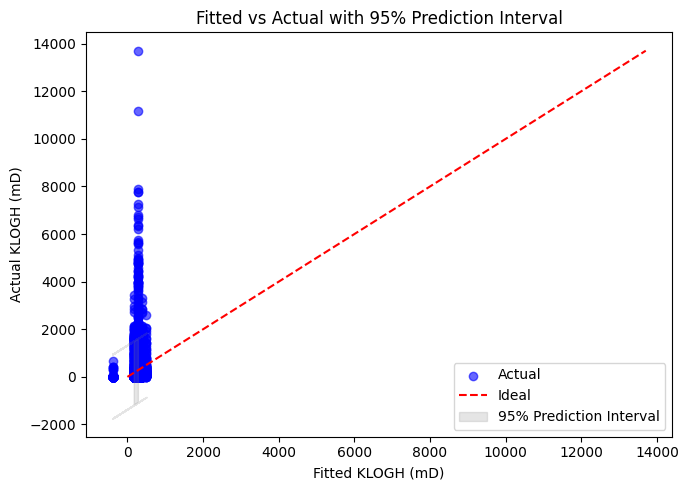

In [ ]:
# --- Prediction Interval for all points ---
pred_all = model.get_prediction(X)
pred_summary_all = pred_all.summary_frame(alpha=0.05)

# Extract fitted and PI
fitted = pred_summary_all['mean']
pi_lower = pred_summary_all['obs_ci_lower']
pi_upper = pred_summary_all['obs_ci_upper']

# Plot
plt.figure(figsize=(7,5))
plt.scatter(fitted, y, color='blue', alpha=0.6, label='Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Ideal')
plt.fill_between(fitted, pi_lower, pi_upper, color='gray', alpha=0.2, label='95% Prediction Interval')
plt.xlabel("Fitted KLOGH (mD)")
plt.ylabel("Actual KLOGH (mD)")
plt.title("Fitted vs Actual with 95% Prediction Interval")
plt.legend()
plt.tight_layout()
plt.show()

Train/Test Split for ML perspective
---

Machine Learning perspective

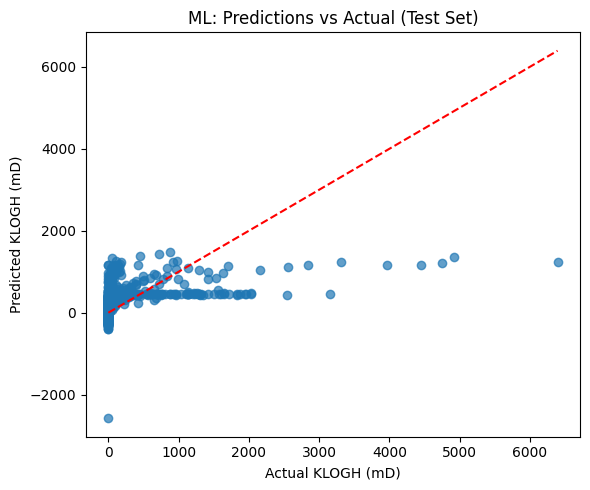

                            OLS Regression Results                            
Dep. Variable:             KLOGH (MD)   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     115.7
Date:                Wed, 17 Dec 2025   Prob (F-statistic):          4.52e-229
Time:                        07:12:32   Log-Likelihood:                -30203.
No. Observations:                3854   AIC:                         6.043e+04
Df Residuals:                    3842   BIC:                         6.051e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.585e+05 

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model on training data
ml_model = sm.OLS(y_train, X_train).fit()
y_pred = ml_model.predict(X_test)

# Plot predictions vs actual (test set)
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual KLOGH (mD)")
plt.ylabel("Predicted KLOGH (mD)")
plt.title("ML: Predictions vs Actual (Test Set)")
plt.tight_layout()
plt.show()

#  Print ML summary on training set
print(ml_model.summary())